# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurani Istiaen
- **Email:** n.istiaen1705@gmail.com / mc459d5x2107@student.devacademy.id
- **ID Dicoding:** MC459D5X2107

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak penjualan terjadi?
- Bagaimana distribusi pelanggan berdasarkan wilayah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel dan menampilkan 5 baris pertama dari DataFrame.

In [2]:
customers = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_reviews = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
orders = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
product_category_name = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv')
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
products = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
sellers = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Mengecek tipe data, missing values, dan data duplikat.

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
customers.duplicated().sum()

np.int64(0)

In [13]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [15]:
order_items.duplicated().sum()

np.int64(0)

In [16]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
order_payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [18]:
order_payments.duplicated().sum()

np.int64(0)

In [19]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [21]:
order_reviews.duplicated().sum()

np.int64(0)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [27]:
orders.duplicated().sum()

np.int64(0)

In [28]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
product_category_name.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [30]:
product_category_name.duplicated().sum()

np.int64(0)

In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [33]:
products.duplicated().sum()

np.int64(0)

In [34]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [36]:
sellers.duplicated().sum()

np.int64(0)

**Insight:**
-



### Cleaning Data

Menangani missing values dengan cara menghapus baris yang memiliki missing values pada **order_reviews, orders dan products**.
Setelah itu, menghitung jumlah baris data setelah proses penghapusan.

In [37]:
order_reviews = order_reviews.dropna()
order_reviews.count()

,0
review_id,9839
order_id,9839
review_score,9839
review_comment_title,9839
review_comment_message,9839
review_creation_date,9839
review_answer_timestamp,9839


In [38]:
orders = orders.dropna()
orders.count()

,0
order_id,96461
customer_id,96461
order_status,96461
order_purchase_timestamp,96461
order_approved_at,96461
order_delivered_carrier_date,96461
order_delivered_customer_date,96461
order_estimated_delivery_date,96461


In [40]:
products = products.dropna()
products.count()

,0
product_id,32340
product_category_name,32340
product_name_lenght,32340
product_description_lenght,32340
product_photos_qty,32340
product_weight_g,32340
product_length_cm,32340
product_height_cm,32340
product_width_cm,32340


Menggabungkan dataset products dan product_category_name

In [41]:
products = pd.merge(products, product_category_name, on='product_category_name', how='left')

Rename kolom product_category_name_english menjadi product_category

In [44]:
# Rename the column
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

**Insight:**
-

## Exploratory Data Analysis (EDA)

### Explore ...

Menghitung jumlah customer dan order

In [49]:
all_customers = customers['customer_unique_id'].nunique()
all_orders = orders.order_id.nunique()
print("number of customers:", all_customers)
print("number of orders:   ", all_orders)

number of customers: 96096
number of orders:    96461


Menggabungkan beberapa dataset menjadi satu dataframe df.

In [50]:
df = pd.merge(orders, customers, on='customer_id')
df = df.merge(order_items, on='order_id')
df = df.merge(order_payments, on='order_id')
df = df.merge(products, on='product_id')
df = df.merge(sellers, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


Distribusi customer per wilayah

In [51]:
customer_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
customer_state = customer_state.sort_values(by=['customer_unique_id'])

Visualisasi jumlah customer per wilayah menggunakan bar chart

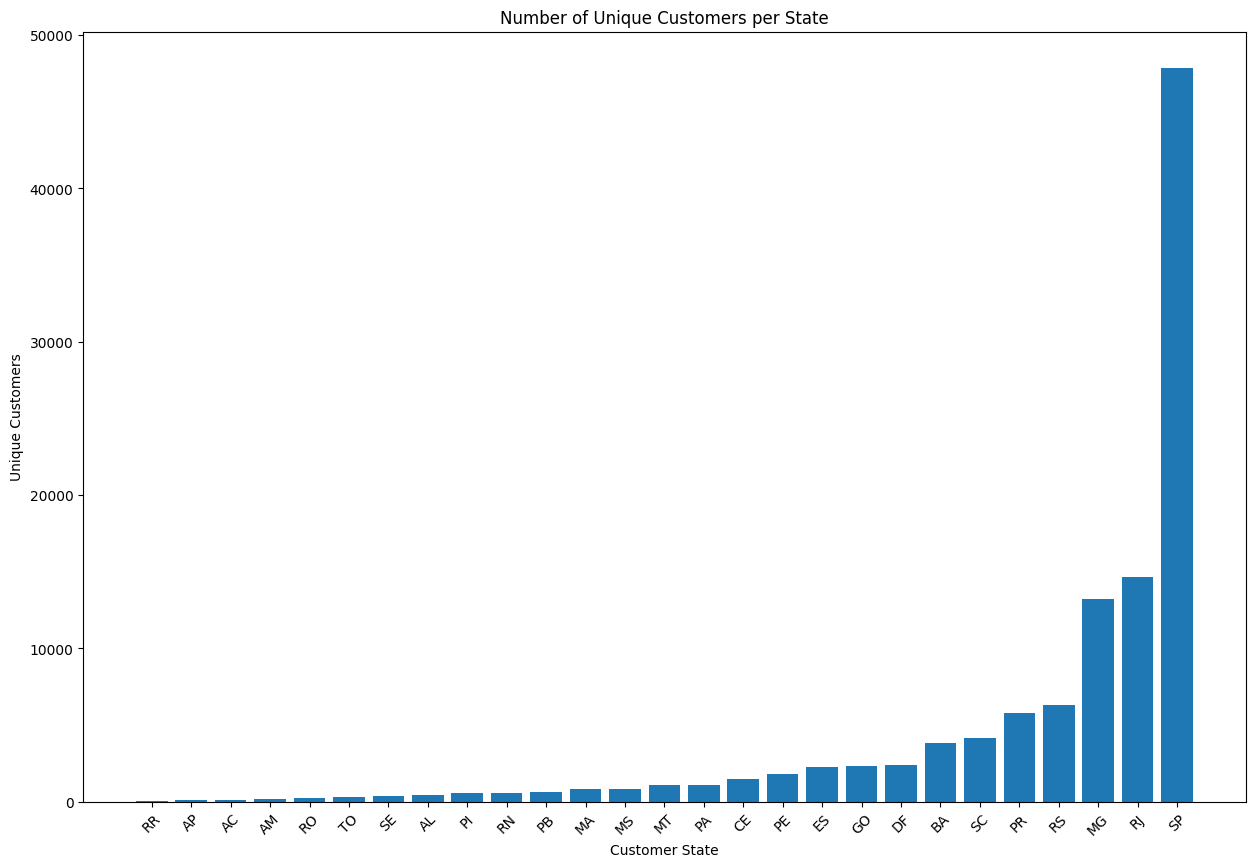

In [55]:
plt.figure(figsize=(15, 10))
plt.bar(customer_state['customer_state'], customer_state['customer_unique_id'])
plt.xlabel("Customer State")
plt.ylabel("Unique Customers")
plt.title("Number of Unique Customers per State")
plt.xticks(rotation=45)
plt.show()

Mengubah kolom tanggal menjadi format tahun, bulan, hari, dan jam.

In [56]:
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

In [57]:
orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
17,10,2016,334,10/2016
20,12,2016,1,12/2016
0,1,2017,948,1/2017


Menampilkan visualisasi tren jumlah order per bulan dan tahun

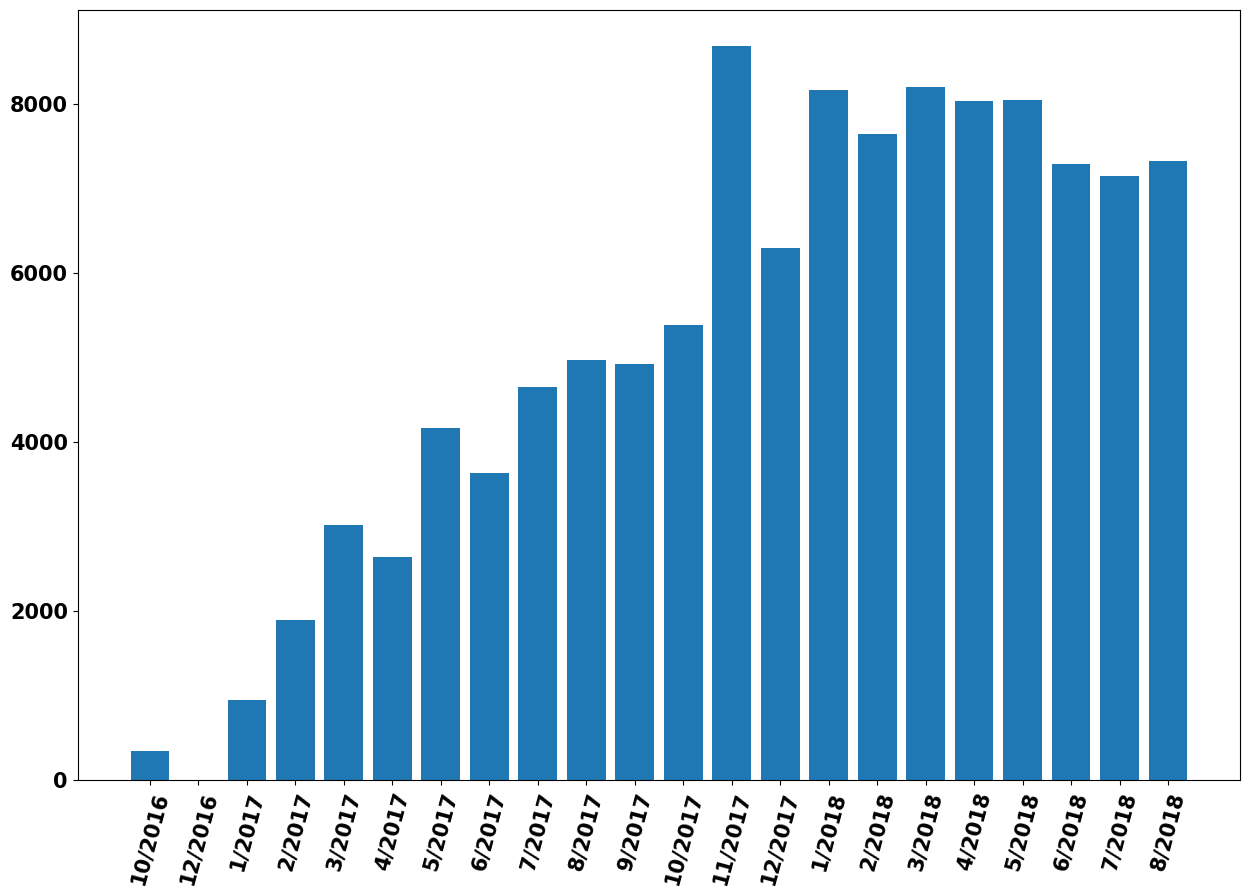

In [58]:
plt.figure(figsize=(15,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [59]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id,period
order_purchase_year,,,
2016,22,335,10/201612/2016
2017,78,51196,1/20172/20173/20174/20175/20176/20177/20178/20...
2018,36,61859,1/20182/20183/20184/20185/20186/20187/20188/2018


Menampilkan 10 kategori produk terlaris berdasarkan jumlah item yang terjual.

In [60]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14347
1,furniture_decor,11800
2,health_beauty,11189
3,sports_leisure,10041
4,computers_accessories,9960
5,housewares,9296
6,watches_gifts,6670
7,garden_tools,5995
8,telephony,5216
9,auto,4932


Visualisasi menggunakan bar chart

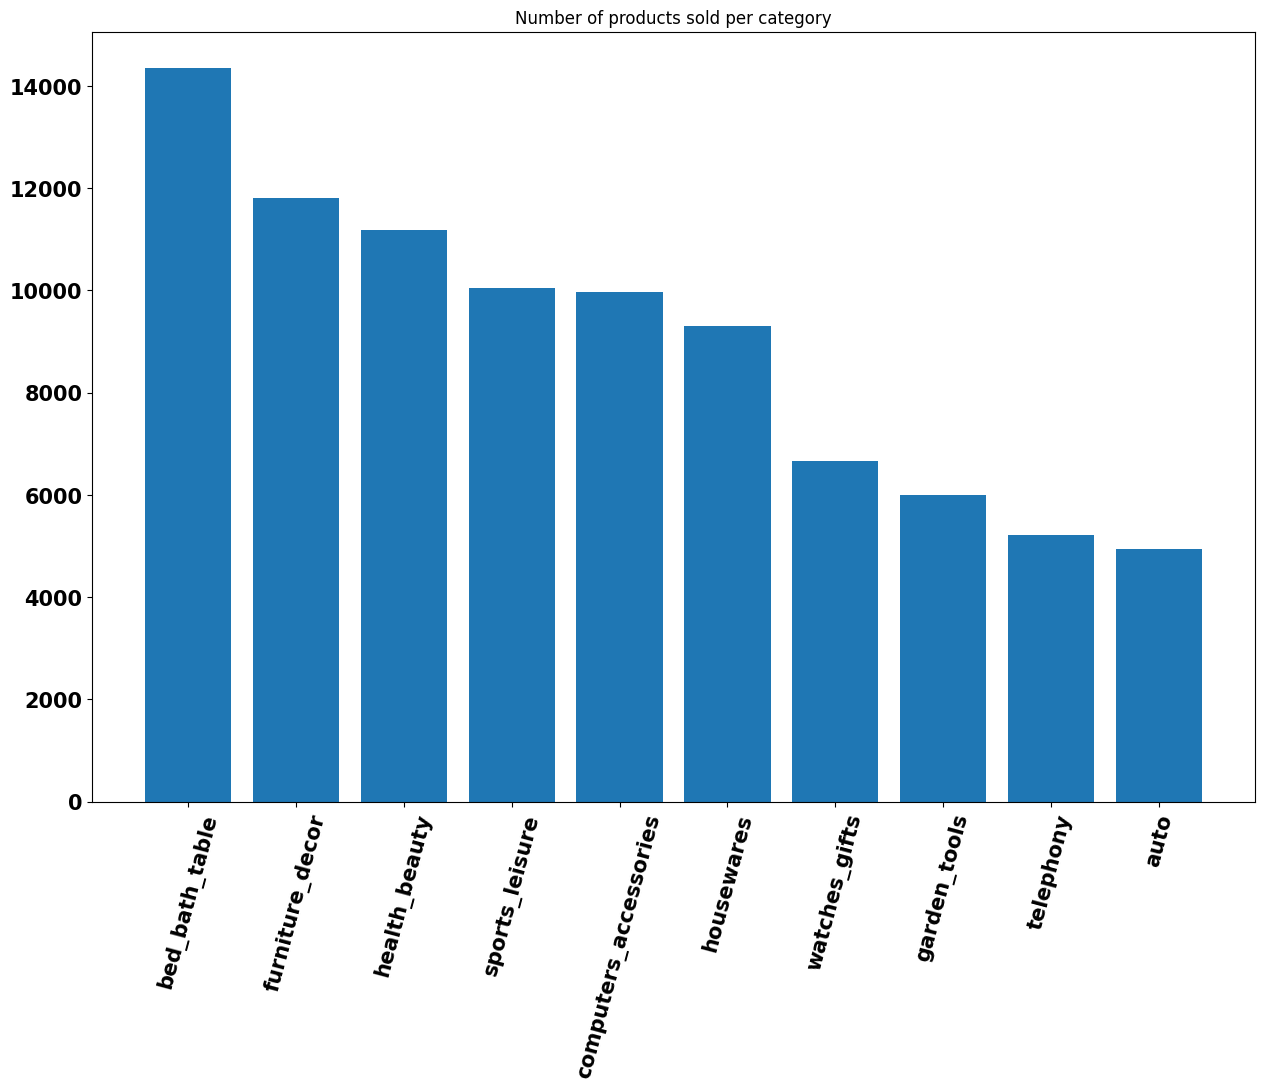

In [61]:
plt.figure(figsize=(15,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

Menampilkan statistik dan informasi dari df

In [62]:
columns = ['order_status', 'customer_state', 'order_item_id', 'price',
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
           'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
df = df[columns]
df.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10,2,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10,2,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10,2,10
3,delivered,BA,1,118.70,22.76,1,boleto,1,141.46,2018,7,24,20
4,delivered,GO,1,159.90,19.22,1,credit_card,3,179.12,2018,8,8,8


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_status          113390 non-null  object 
 1   customer_state        113390 non-null  object 
 2   order_item_id         113390 non-null  int64  
 3   price                 113390 non-null  float64
 4   freight_value         113390 non-null  float64
 5   payment_sequential    113390 non-null  int64  
 6   payment_type          113390 non-null  object 
 7   payment_installments  113390 non-null  int64  
 8   payment_value         113390 non-null  float64
 9   order_purchase_year   113390 non-null  int32  
 10  order_purchase_month  113390 non-null  int32  
 11  order_purchase_day    113390 non-null  int32  
 12  order_purchase_hour   113390 non-null  int32  
dtypes: float64(3), int32(4), int64(3), object(3)
memory usage: 9.5+ MB


In [64]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
count,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000
mean,1.196843,120.184057,20.023985,1.089937,2.942367,172.241850,2017.542588,6.038566,15.555058,14.763621
std,0.701270,182.761548,15.752500,0.682057,2.777802,266.596347,0.504081,3.221380,8.666251,5.326934
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,2017.000000,3.000000,8.000000,11.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.140000,2018.000000,6.000000,16.000000,15.000000
75%,1.000000,133.732500,21.200000,1.000000,4.000000,189.370000,2018.000000,8.000000,23.000000,19.000000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,2018.000000,12.000000,31.000000,23.000000


In [65]:
df.isna().sum()

,0
order_status,0
customer_state,0
order_item_id,0
price,0
freight_value,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0
order_purchase_year,0


**Insight:**
- **Bed Bath Table** merupakan produk dengan order terbanyak yaitu (14,347) item, disusul oleh **Furniture Decor** (11,800) dan **Health Beauty** (11,189). Menunjukkan bahwa kebutuhan rumah tangga, dekorasi, dan produk kesehatan/keindahan memiliki popularitas tinggi dalam pesanan.

- **Harga rata-rata**: IDR 120.18 dengan harga maksimal mencapai IDR 6,735.
- **Freight value rata-rata**: IDR 20.02, dengan nilai maksimal mencapai IDR 409.68.
- Selisih antara harga rata-rata dan freight value menunjukkan bahwa ongkos kirim relatif kecil dibandingkan harga produk.
- Penggunaan metode pembayaran menunjukkan fleksibilitas pelanggan dalam memilih opsi pembayaran.
- Rata-rata pembelian dilakukan di waktu sore pukul **14:00 hingga 15:00**.

### Pertanyaan 1:
- Kapan waktu puncak penjualan terjadi?
Pada bulan 11 tahun 2017

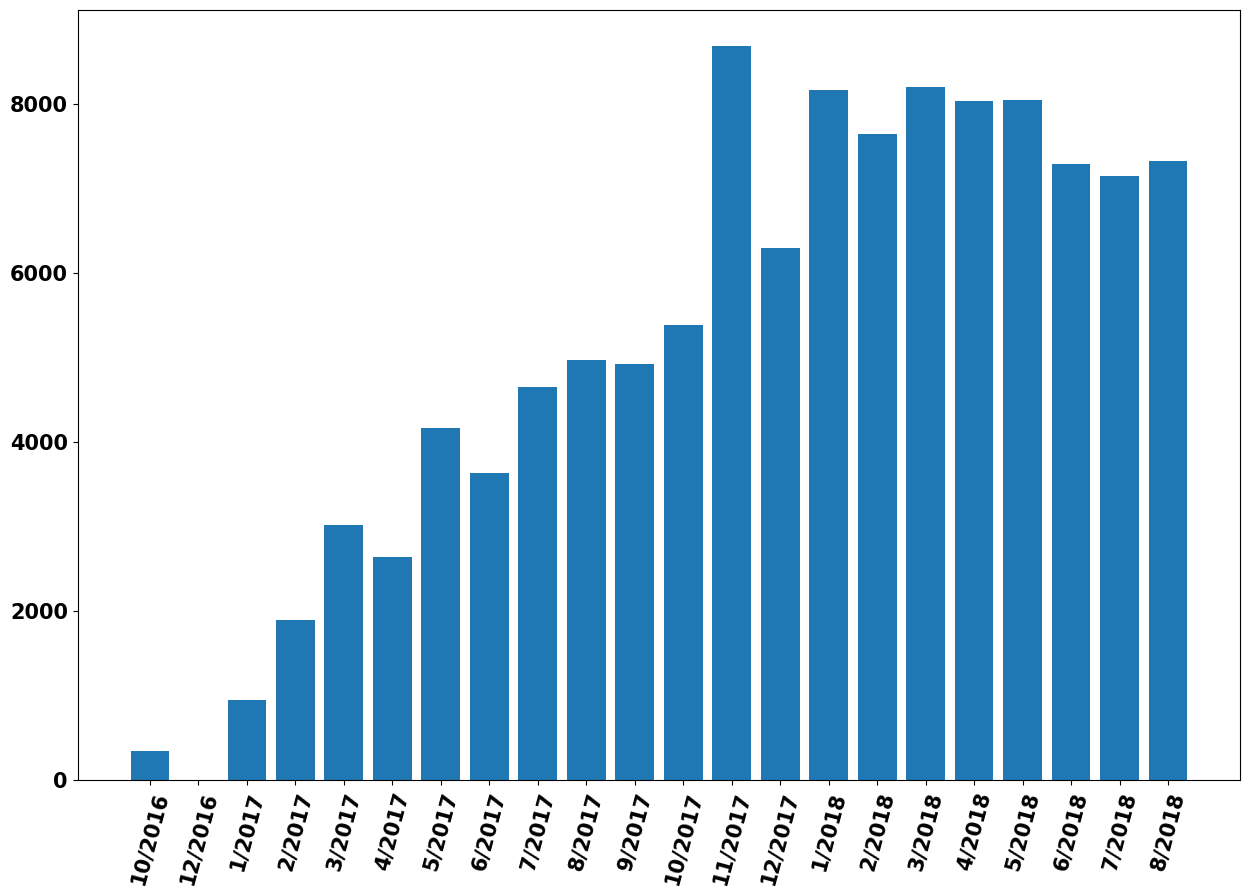

In [67]:
plt.figure(figsize=(15,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

### Pertanyaan 2:
- Bagaimana distribusi pelanggan berdasarkan wilayah?

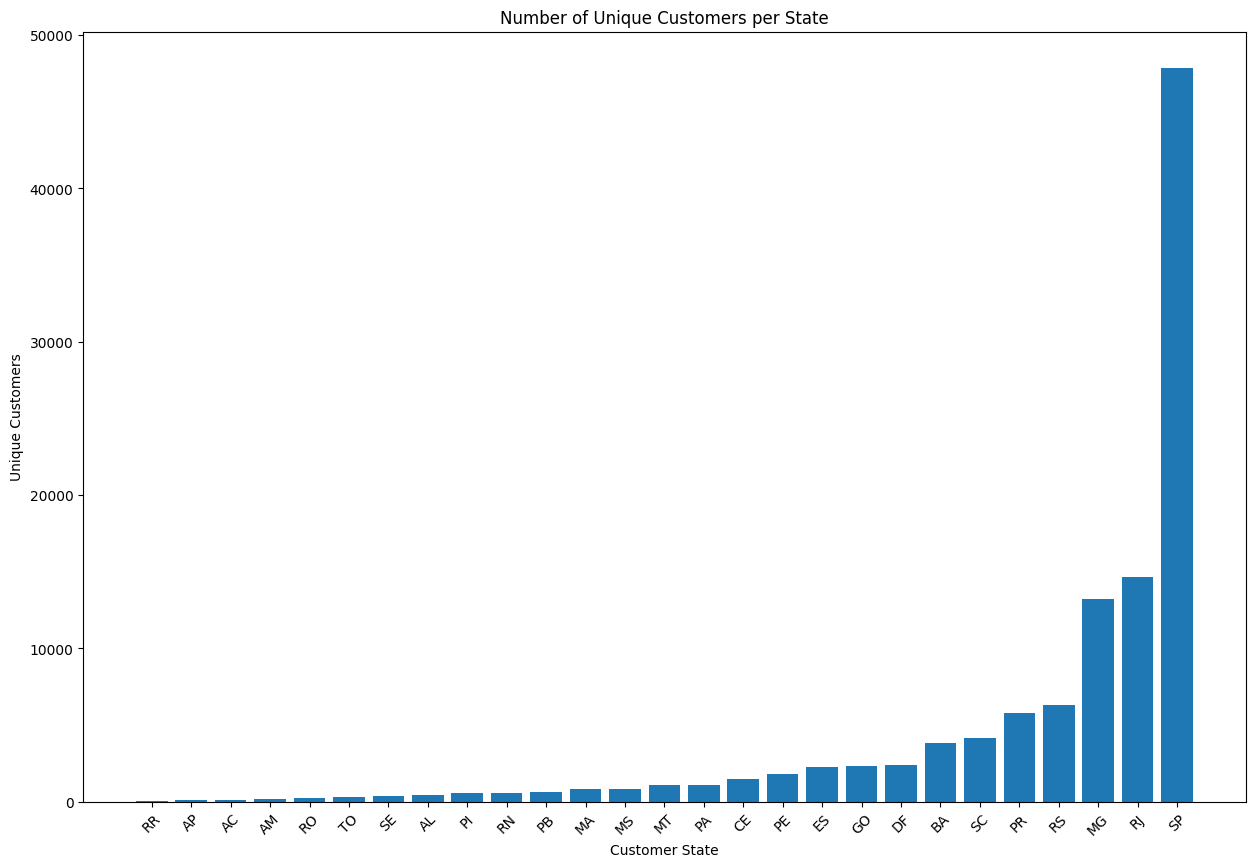

In [68]:
plt.figure(figsize=(15, 10))
plt.bar(customer_state['customer_state'], customer_state['customer_unique_id'])
plt.xlabel("Customer State")
plt.ylabel("Unique Customers")
plt.title("Number of Unique Customers per State")
plt.xticks(rotation=45)
plt.show()

In [70]:
df.to_csv("data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion